## Multiple Linear regression 

### It is wen we have more than 1 independent features

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib as plt


In [40]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [41]:
#We are gonna pre process ts and drop useless shit 
#Also we have two independent features that are interest_rate, unemploument rate 

In [42]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [43]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [44]:
#check for NULL values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [45]:
import seaborn as sns


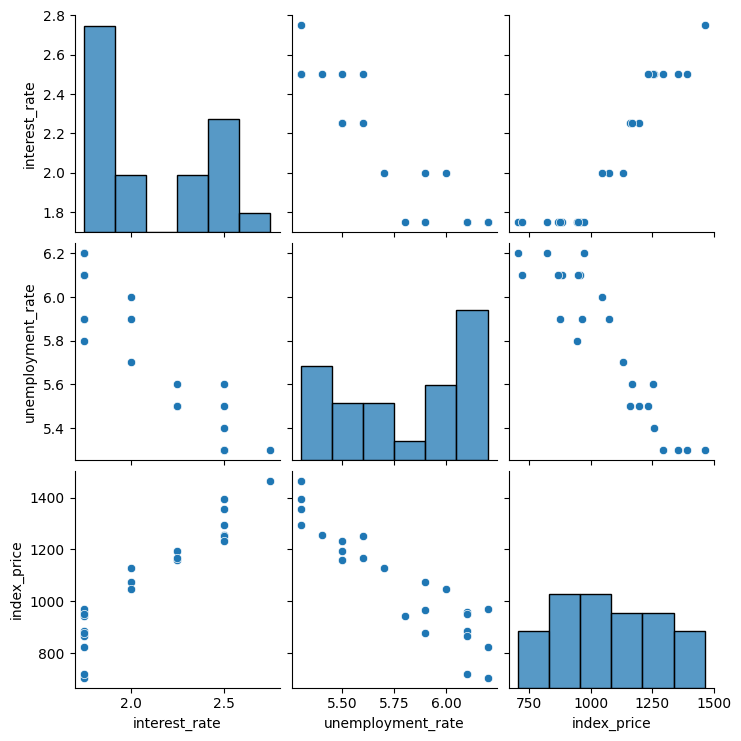

In [46]:
sns.pairplot(df)

In [47]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [48]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Unemployument rate')

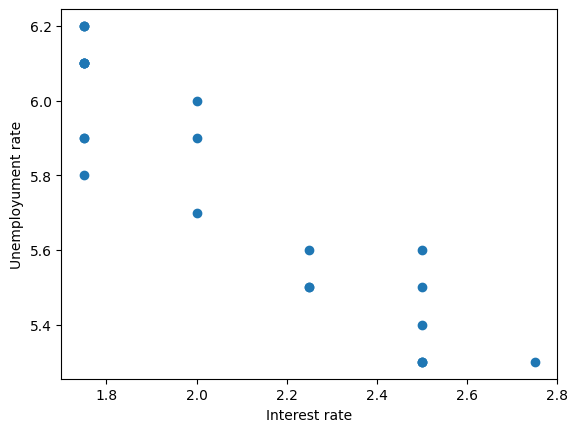

In [49]:
#visuliasing extra 
plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.xlabel('Interest rate')
plt.ylabel('Unemployument rate')

## iloc revison 

### integer location based indexing 

### iloc(row, colmn)

### slicing format (start : stop), (start : stop)

X = df_index.iloc[:, :-1]

Break it:

: → All rows

:-1 → All columns except last

### ==========

: → All rows

-1 → Only last column

In [50]:
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


In [51]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [52]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [53]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [54]:
#train test split
from sklearn.model_selection import train_test_split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

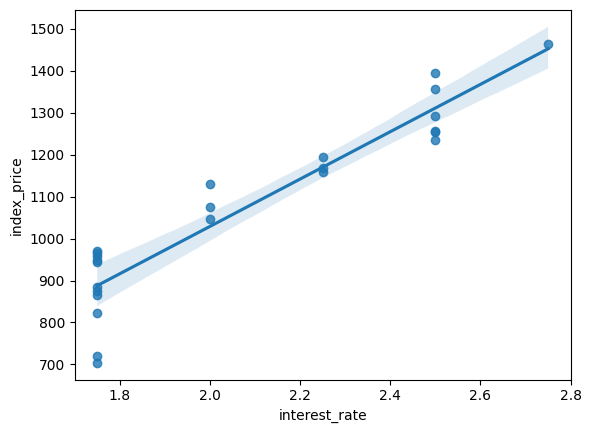

In [56]:
import seaborn as sns
sns.regplot(x=df['interest_rate'], y=df['index_price'])

#### Here the lightly shaded lines shows that the line can bechanges through hyperparameter 

In [57]:
from sklearn.preprocessing import StandardScaler


In [58]:
scaler = StandardScaler()


In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [61]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [62]:
#cross vlaidation 
from sklearn.model_selection import cross_val_score

vlaidation_score = cross_val_score(regression, X, y, scoring='neg_mean_squared_error', cv=3)

In [63]:
np.mean(vlaidation_score)

np.float64(-7418.997871943825)

In [64]:
#predicion
y_pred = regression.predict(X_test)

In [65]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

In [66]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306607
73.80444932337097
90.04758423359623


In [67]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


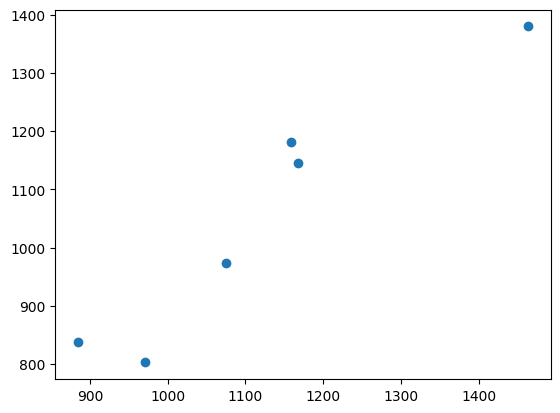

In [68]:
plt.scatter(y_test,y_pred)


In [69]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


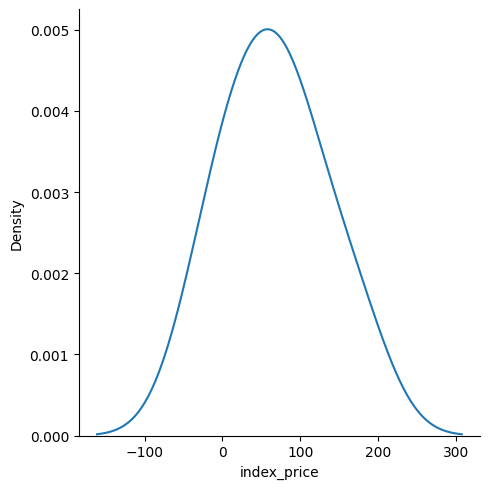

In [70]:
## Plot this residuals
sns.displot(residuals,kind='kde')

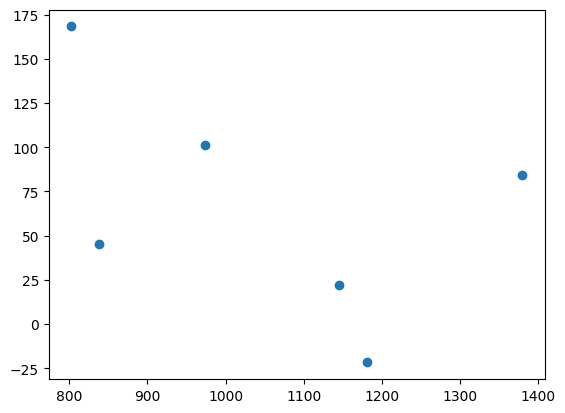

In [72]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [73]:
!pip install statsmodels


In [74]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [75]:
model.summary()


/opt/anaconda3/envs/dsml/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 05 Feb 2026   Prob (F-statistic):                       0.754
Time:                        16:50:04   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
print(regression.coef_)


[  88.27275507 -116.25716066]
